# Weight of evidence 

Weight of Evidence (WoE)

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [19]:
df = pd.read_csv('../data/titanic.csv')

In [20]:
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [21]:
# extract the first letter of cabin 
# astype(str) will convert NaN to 'nan'

df['cabin'] = df['cabin'].astype(str).str[0]
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,n,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,n,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,n,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,n,C,NaN,NaN,NaN


In [22]:
# check labels 
df['cabin'].unique()

array(['B', 'C', 'E', 'D', 'A', 'n', 'T', 'F', 'G'], dtype=object)

In [23]:
len(df['cabin'].unique())

9

In [24]:
# number of data points
df.groupby('cabin')['survived'].count()

cabin
A      22
B      65
C      94
D      46
E      41
F      21
G       5
T       1
n    1014
Name: survived, dtype: int64

In [25]:
# percentage of labels 
round(df.groupby('cabin')['survived'].count()/len(df) * 100)

cabin
A     2.0
B     5.0
C     7.0
D     4.0
E     3.0
F     2.0
G     0.0
T     0.0
n    77.0
Name: survived, dtype: float64

In [26]:
# remove cabin = T 
df = df[df['cabin'] != 'T']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df[['cabin', 'sex', 'embarked', 'survived']],  # we keep the target 
                                                    df['survived'],
                                                   test_size=0.3, 
                                                   random_state=0)

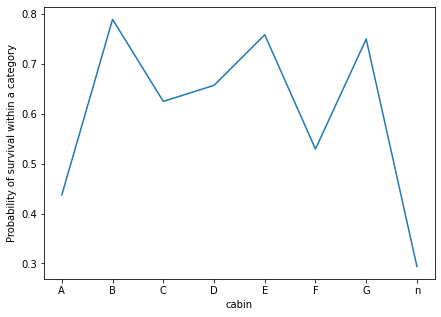

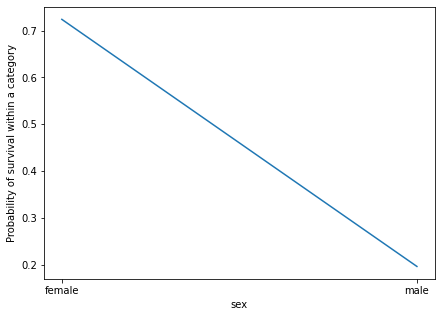

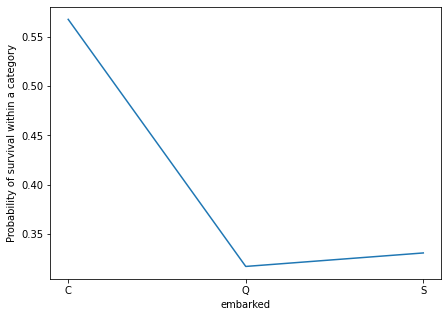

In [30]:
for var in ['cabin', 'sex', 'embarked']:

    fig, ax = plt.subplots(figsize=(7, 5))
    plt.plot(X_train.groupby([var])['survived'].mean())

    plt.xlabel(var)
    plt.ylabel('Probability of survival within a category')
    plt.show()

## Apply WOE

In [41]:
X_train['non_survived'] = np.where(X_train['survived']==1, 0, 1)

X_train

,cabin,sex,embarked,survived,non_survived
588,n,female,S,1,0
428,n,female,S,1,0
479,n,female,C,1,0
1229,n,male,S,0,1
454,n,male,S,1,0
...,...,...,...,...,...
764,n,male,S,0,1
836,n,male,S,0,1
1217,F,male,S,0,1
560,n,female,S,1,0


In [42]:
total_survived = X_train['survived'].sum()
total_non_survived = X_train['non_survived'].sum()

print(f"Total survived: {total_survived}")
print(f"Total non-survived: {total_non_survived}")

Total survived: 346
Total non-survived: 569


In [50]:
survived_df = X_train[X_train['survived']==1].groupby(['cabin'])['survived'].count()/total_survived
non_survived_df = X_train[X_train['non_survived']==1].groupby(['cabin'])['non_survived'].count()/total_non_survived

In [51]:
survived_df

cabin
A    0.020231
B    0.086705
C    0.130058
D    0.066474
E    0.063584
F    0.026012
G    0.008671
n    0.598266
Name: survived, dtype: float64

In [52]:
non_survived_df

cabin
A    0.015817
B    0.014060
C    0.047452
D    0.021090
E    0.012302
F    0.014060
G    0.001757
n    0.873462
Name: non_survived, dtype: float64

In [54]:
prob_df = pd.concat([survived_df, non_survived_df], axis=1)
prob_df

,survived,non_survived
cabin,,
A,0.020231,0.015817
B,0.086705,0.014060
C,0.130058,0.047452
D,0.066474,0.021090
E,0.063584,0.012302
F,0.026012,0.014060
G,0.008671,0.001757
n,0.598266,0.873462


In [55]:
prob_df['woe'] = np.log(prob_df['survived']/prob_df['non_survived'])

In [56]:
prob_df

,survived,non_survived,woe
cabin,,,
A,0.020231,0.015817,0.246127
B,0.086705,0.014060,1.819197
C,0.130058,0.047452,1.008267
D,0.066474,0.021090,1.148029
E,0.063584,0.012302,1.642574
F,0.026012,0.014060,0.615225
G,0.008671,0.001757,1.596054
n,0.598266,0.873462,-0.378430


In [58]:
# capture into a dictionary 

ordered_labels = prob_df['woe'].to_dict()
ordered_labels

{'A': 0.24612723078770063,
 'B': 1.819197499050926,
 'C': 1.0082672828345973,
 'D': 1.148029225209756,
 'E': 1.6425739633716092,
 'F': 0.6152246947249902,
 'G': 1.5960539477367164,
 'n': -0.37842957376265296}

In [59]:
X_train['cabin'] = X_train['cabin'].map(ordered_labels)
X_test['cabin'] = X_test['cabin'].map(ordered_labels)

In [60]:
X_train

,cabin,sex,embarked,survived,non_survived
588,-0.378430,female,S,1,0
428,-0.378430,female,S,1,0
479,-0.378430,female,C,1,0
1229,-0.378430,male,S,0,1
454,-0.378430,male,S,1,0
...,...,...,...,...,...
764,-0.378430,male,S,0,1
836,-0.378430,male,S,0,1
1217,0.615225,male,S,0,1
560,-0.378430,female,S,1,0


In [61]:
X_test

,cabin,sex,embarked,survived
1279,-0.378430,female,S,0
413,-0.378430,male,S,0
529,-0.378430,female,S,1
1150,-0.378430,male,S,0
723,-0.378430,male,Q,0
...,...,...,...,...
580,-0.378430,female,S,1
1080,-0.378430,male,Q,1
1143,-0.378430,male,Q,0
89,1.819197,male,S,0
